In [2]:
#Kutubxonalar import qilindi
import pytesseract
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2 
import numpy as np

In [ ]:
dataset_folder = "/Users/mansurjonovnurmuhammad/Desktop/3_dars/images" #dataset ornatildi
image_files = [f for f in os.listdir(dataset_folder) if f.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff"))] #rasmlar o'qildi
print(f"Found {len(image_files)} images in dataset") #`dataset` papkasidagi rasmlar soni chiqarildi


Found 3 images in dataset


Extracted text from img_2.jpg:
~S
". WHATNS COMING IS BETTER
_. THAN WHATJS GONE.
i i)
ie
, ~- Fag |
a "4 a :
Tra ae
Kf" :
_ ©
:
--------------------------------------------------


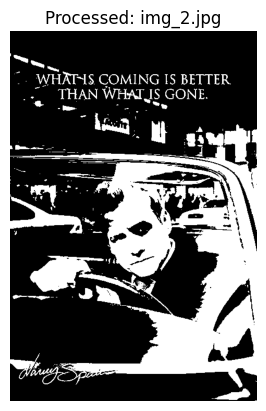

Extracted text from img_3.jpg:
‘f un . , '
EARN ha i
is ¥/'
y US b
:
--------------------------------------------------


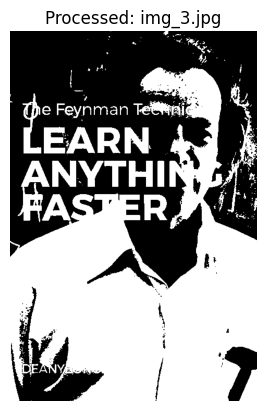

Extracted text from img.jpg:
"IF YOU QUIT,
YOU NEVER
REALLY WANTED
IT IN THE FIRST
PLACE.’
eo
:
--------------------------------------------------


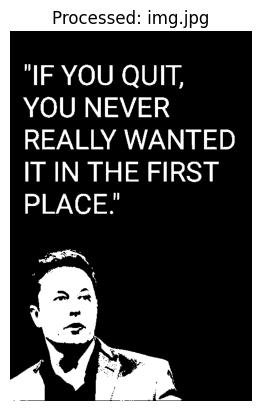

In [ ]:
for img_file in image_files:  #har bir rasm faylini qayta ishlash
    img_path = os.path.join(dataset_folder,img_file) #rasm faylining to'liq yo'lini olish

    image = cv2.imread(img_path) #rasmni o'qish

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #rasmni kulrang rangga o'zgartirish

    thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] #rasmlarni chegaralash

    text = pytesseract.image_to_string(thresh,config="--psm 6") # chegaralangan rasmlardan matn chiqarish

    print(f"Extracted text from {img_file}:\n{text}:\n{"-"*50}") # olingan matnni chiqarish

    plt.imshow(thresh,cmap="gray") #binarizatsiya qilingan rasmni kulrang tonlarda ekranda ko'rsatadi.
    plt.axis("off") # faqat rasmni ko'rsatadi
    plt.title(f"Processed: {img_file}") # matplotlib yordamida nom berish
    plt.show() # matplotlib yordamida ko'rsatish

In [ ]:
output_folder = "text_detection_output" #natija saqlanadigan papka yaratish
os.makedirs(output_folder,exist_ok=True) #yangi papka yaratish

for img_file in image_files: #har bir rasm uchun
    img_path = os.path.join(dataset_folder,img_file) # rasm faylining to'liq yo'lini olish

    image = cv2.imread(img_path) #rasmni o'qish
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #rasmni kulrang rangga o'zgartirish
    thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] #rasmlarni chegaralash

    output_path = os.path.join(output_folder,f"Processed_{img_file}") #natija saqlanadigan papka yo'lini olish
    cv2.imwrite(output_path,thresh) #chegaralangan rasmni saqlash

print(f"All processed images saved ad {output_folder}")

All processed images saved ad text_detection_output
